In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
#np.random.seed(7)

In [2]:
df = pd.read_csv("preprocessed_data_2.csv")

In [3]:
df.shape

(86, 286)

In [4]:
#Transform the input data
df = df.T
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df=df.reset_index()

In [5]:
df

,index,ENSG00000005249,ENSG00000005961,ENSG00000008988,ENSG00000019582,ENSG00000034510,ENSG00000035403,ENSG00000071082,ENSG00000082781,ENSG00000089009,...,ENSG00000197756,ENSG00000197956,ENSG00000197958,ENSG00000198034,ENSG00000198858,ENSG00000204628,ENSG00000213741,ENSG00000231500,ENSG00000233927,ENSG00000235162
0,X3.Breast.Her2.ampl,665.945813,4218.716755,651.409478,1577.646526,443.812455,9186.963244,660.494687,242.120817,269.830704,...,198.966075,138.549436,623.245331,715.005941,84.492443,922.602964,640.961488,1440.459872,123.558841,107.205465
1,X8.Breast.WT,1157.771637,12408.496492,313.690161,1170.518763,167.375316,15313.73293,225.56872,535.933544,110.290357,...,77.591206,77.591206,180.676665,309.256378,163.495755,521.523748,146.869068,372.992011,47.108946,272.677666
2,X10.Breast.Her2.ampl,951.283856,11195.879231,306.489448,986.280921,206.800838,11981.722417,249.221523,412.54116,125.14102,...,72.645423,57.798183,197.256184,238.616352,179.757652,375.42306,144.230328,477.762962,53.025856,224.829629
3,Breast.100,977.775797,4036.502512,547.351096,872.7115,481.262264,6264.882362,742.228422,227.074449,201.655667,...,376.197967,169.458544,518.543144,630.385783,127.093908,745.617592,633.774954,1650.526216,240.631132,244.020303
4,X15.Breast.Her2.ampl,1158.788504,12141.479294,334.662838,1243.559928,221.142844,18606.221775,248.417128,378.891407,109.097137,...,111.308565,53.074283,195.342846,300.017125,205.662845,495.359971,186.497132,565.388539,58.234282,163.645705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,MGH.NSCLC.L40.TR520,7510.768157,9746.333375,577.16568,517.773961,278.68422,6059.478203,86.803282,2672.627355,97.463334,...,120.306303,65.483177,568.028492,379.193283,1312.709276,395.944793,169.037969,983.770525,150.763594,1072.096671
281,MGH.NSCLC.L51.TR521,10820.087215,33447.642394,265.72299,405.275352,210.28438,13501.213066,172.050857,3459.178059,82.202076,...,95.583809,115.656409,173.962533,207.416866,1344.864197,621.294761,115.656409,472.184018,76.467047,2777.665499
282,MGH.NSCLC.L58.TR525,10442.268368,29908.560651,159.078325,304.696177,200.683426,12334.688598,183.551914,2802.837722,131.545538,...,88.716758,38.545902,201.295265,154.795447,1434.764125,310.814574,84.43388,378.728782,111.354828,1718.657752
283,MGH.NSCLC.L59.TR522,11065.272946,9109.910809,438.749919,466.537413,266.174951,12754.460132,551.362398,2037.262122,339.299937,...,229.612457,52.64999,1035.449808,721.012366,1642.387195,1695.037185,302.737444,1304.549758,261.787451,735.637363


In [6]:
df['index'] = df['index'].replace(r'^(HD|Control).+', 0, regex=True)
df['index'] = df['index'].replace(r'^.+$', 1, regex=True)
#df['index'] = df['index'].replace(r'(Breast|BrCa).+', 1, regex=True)
#df['index'] = df['index'].replace(r'Lung.+', 2, regex=True)
#df['index'] = df['index'].replace(r'Panc', 3, regex=True)
#df['index'] = df['index'].replace(r'GBM', 4, regex=True)
#df['index'] = df['index'].replace(r'CRC.+', 5, regex=True)
#df['index'] = df['index'].replace(r'Vu.+', 5, regex=True)

In [7]:
df['index'].value_counts()

1    231
0     54
Name: index, dtype: int64

In [8]:
df.head()

,index,ENSG00000005249,ENSG00000005961,ENSG00000008988,ENSG00000019582,ENSG00000034510,ENSG00000035403,ENSG00000071082,ENSG00000082781,ENSG00000089009,...,ENSG00000197756,ENSG00000197956,ENSG00000197958,ENSG00000198034,ENSG00000198858,ENSG00000204628,ENSG00000213741,ENSG00000231500,ENSG00000233927,ENSG00000235162
0,1,665.945813,4218.716755,651.409478,1577.646526,443.812455,9186.963244,660.494687,242.120817,269.830704,...,198.966075,138.549436,623.245331,715.005941,84.492443,922.602964,640.961488,1440.459872,123.558841,107.205465
1,1,1157.771637,12408.496492,313.690161,1170.518763,167.375316,15313.73293,225.56872,535.933544,110.290357,...,77.591206,77.591206,180.676665,309.256378,163.495755,521.523748,146.869068,372.992011,47.108946,272.677666
2,1,951.283856,11195.879231,306.489448,986.280921,206.800838,11981.722417,249.221523,412.54116,125.14102,...,72.645423,57.798183,197.256184,238.616352,179.757652,375.42306,144.230328,477.762962,53.025856,224.829629
3,1,977.775797,4036.502512,547.351096,872.7115,481.262264,6264.882362,742.228422,227.074449,201.655667,...,376.197967,169.458544,518.543144,630.385783,127.093908,745.617592,633.774954,1650.526216,240.631132,244.020303
4,1,1158.788504,12141.479294,334.662838,1243.559928,221.142844,18606.221775,248.417128,378.891407,109.097137,...,111.308565,53.074283,195.342846,300.017125,205.662845,495.359971,186.497132,565.388539,58.234282,163.645705


In [9]:
df['index'].value_counts()

1    231
0     54
Name: index, dtype: int64

In [10]:
bucket_list = df.index[df['index'] == 0] # index of all normal samples
col_names = df.columns[1:].values

In [11]:
import random
import numpy as np
### REPLICATE SOME NON CANCER SAMPLES
for i in range(177):
    new_row = df.loc[random.choice(bucket_list)].copy()  # Randomly select a row from existing dataframe
    for col in col_names:
        delta = np.random.uniform(-20,20)  # Random delta value within the specified range
        new_row[col] += delta  # Increase or decrease the selected column by the delta
    df.loc[len(df)+i] = new_row  # Append the new row to the dataframe
df["index"].value_counts()

1    231
0    231
Name: index, dtype: int64

In [12]:
X = df.drop("index",axis=1)
y = df["index"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [13]:
y_test.value_counts(),y_train.value_counts()

(0    73
 1    66
 Name: index, dtype: int64,
 1    165
 0    158
 Name: index, dtype: int64)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model=RandomForestClassifier(random_state=42)

# defining parameter range
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,12,14,16,20],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto;, score=0.938 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto;, score=0.892 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto;, score=0.969 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto;, score=0.906 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto;, score=0.969 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt;, score=0.938 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt;, score=0.892 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt;, score=0.969 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt;, score=0.906 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt;, score=0.969 total time=   0.2

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [15]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}
RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.95      0.91      0.93        66

    accuracy                           0.94       139
   macro avg       0.94      0.93      0.93       139
weighted avg       0.94      0.94      0.94       139



In [17]:
model_RF = grid.best_estimator_
model_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)

In [18]:
def roc(X_train,y_train,model,label):
    cv = StratifiedKFold(n_splits=6)
    classifier = model
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X_train, y_train)):
        classifier.fit(X_train.iloc[train], y_train.iloc[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_train.iloc[test],
            y_train.iloc[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=label,
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()



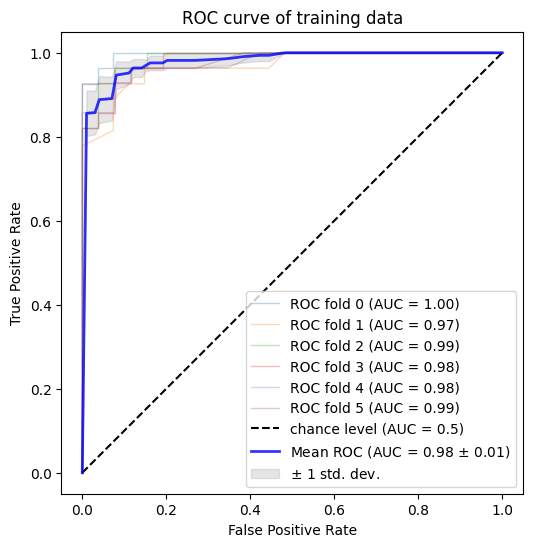

In [19]:
model = RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)
label="ROC curve of training data"
roc(X_train,y_train,model,label)

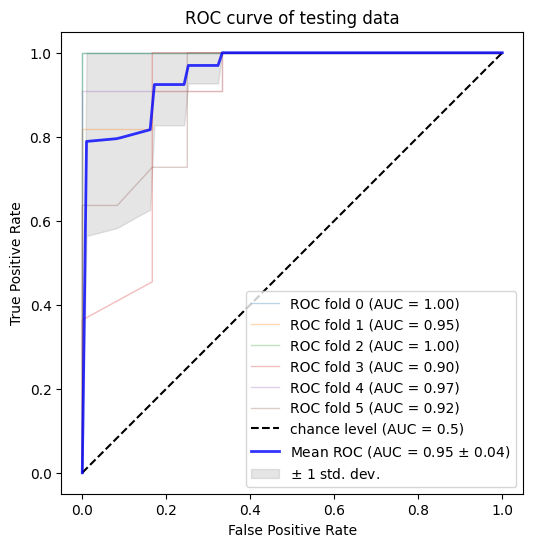

In [20]:
label="ROC curve of testing data"
roc(X_test,y_test,model,label)

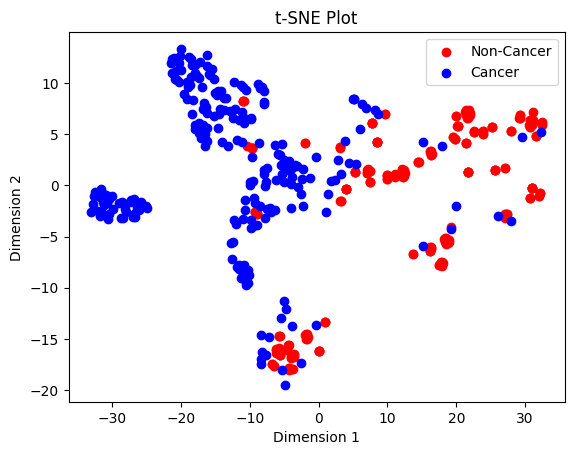

In [21]:
from sklearn.manifold import TSNE
# Assuming your data is stored in the variable 'data'
tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(df)

# Step 2: Separate data points by class
class_1_indices = np.where(df['index'] == 0)[0]
class_2_indices = np.where(df['index'] == 1)[0]

class_1_data = embedded_data[class_1_indices]
class_2_data = embedded_data[class_2_indices]

# Step 3: Plot the t-SNE plot with different colors for each class
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], color='red', label='Non-Cancer')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], color='blue', label='Cancer')

plt.title('t-SNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()



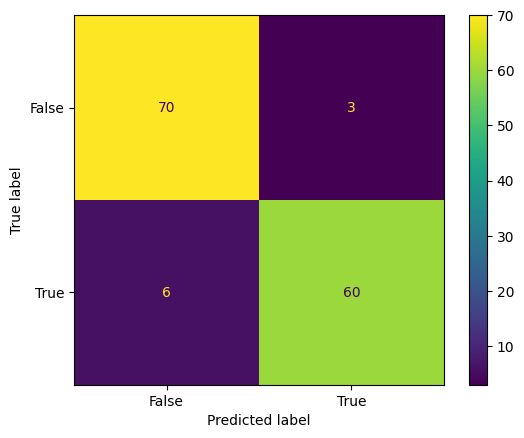

In [22]:
#######CONFUSION MATRIX ###########
from sklearn import metrics
y_test_pred_RF = model_RF.predict(X_test)
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred_RF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()

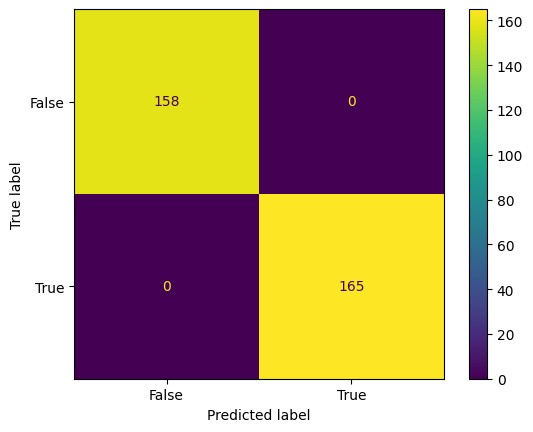

In [23]:
#######CONFUSION MATRIX ###########
y_train_pred_RF = model_RF.predict(X_train)
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train_pred_RF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()

In [24]:
# for important features:
important_feat = model_RF.feature_importances_
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:18]

In [25]:
df1 = pd.read_csv("preprocessed_data_2.csv")

In [26]:
top_met = df1.iloc[idx]

In [27]:
top_met

,genes,X3.Breast.Her2.ampl,X8.Breast.WT,X10.Breast.Her2.ampl,Breast.100,X15.Breast.Her2.ampl,X16.Breast.WT,X21.Breast.WT,X33.Breast.Her2.ampl,X42.Breast.Her2.ampl,...,MGH.NSCLC.L20.TR500,MGH.NSCLC.L22.TR462,MGH.NSCLC.L23.TR524,MGH.NSCLC.L25.TR480,MGH.NSCLC.L39.TR519,MGH.NSCLC.L40.TR520,MGH.NSCLC.L51.TR521,MGH.NSCLC.L58.TR525,MGH.NSCLC.L59.TR522,MGH.NSCLC.L65.TR523
46,ENSG00000145425,631.876279,256.605202,228.541439,552.434853,238.834272,445.576660,583.621247,402.883970,412.898298,...,246.972202,807.331269,758.189521,202.001456,153.478942,239.089741,291.530618,287.564665,1032.524808,98.424511
1,ENSG00000005961,4218.716755,12408.496492,11195.879231,4036.502512,12141.479294,4658.695357,5113.973742,6723.369143,8887.991802,...,12272.166315,13250.084172,27600.834654,28451.949631,29487.064755,9746.333375,33447.642394,29908.560651,9109.910809,26162.465255
10,ENSG00000100316,2565.208734,1099.578232,1168.689866,2175.847701,1348.971350,1577.933554,1973.365624,2604.495889,2015.370828,...,698.774523,2222.563761,1988.717432,731.476640,357.501151,676.151878,697.761808,553.103100,3237.974399,334.489548
27,ENSG00000122406,518.311168,167.375316,179.227393,562.602365,140.057135,283.089223,398.599629,421.020226,425.712383,...,189.149345,789.310482,640.104923,179.754600,193.543727,196.449532,163.448314,149.900729,620.099885,36.909192
59,ENSG00000163682,633.239061,214.484262,166.501188,588.021147,299.279983,329.307872,452.142862,428.792907,382.998766,...,203.850071,735.248120,476.658559,120.133025,104.784820,158.377917,294.398133,163.973043,457.762415,92.272979
64,ENSG00000168028,288.909643,74.265869,104.991195,191.488154,143.005706,171.875600,186.211468,248.725795,180.109085,...,98.984890,287.131210,247.689644,115.683653,192.310964,191.880938,111.833057,135.216576,263.249951,103.038160
37,ENSG00000137154,1482.706093,479.957031,553.589936,1469.205574,557.279968,795.105191,1443.287610,1221.606378,956.073127,...,369.478254,1369.579831,1066.361519,359.509200,276.138820,653.308909,393.805294,331.005284,1110.037294,71.511559
81,ENSG00000204628,922.602964,521.523748,375.423060,745.617592,495.359971,879.598658,885.843055,1044.130160,858.543702,...,343.996995,1100.469408,1071.401716,438.708009,173.819525,395.944793,621.294761,310.814574,1695.037185,219.917266
41,ENSG00000142541,1246.036401,488.824597,459.734171,1081.145509,681.119960,751.053042,1195.203961,1043.482436,1030.110063,...,432.201353,1559.398790,1445.096266,429.809266,396.949554,671.583284,536.225170,460.103464,1768.162172,196.080080
43,ENSG00000142937,287.546862,83.687658,80.069043,345.695429,92.142852,233.259743,286.753763,230.589539,186.516128,...,98.004842,433.700280,347.053513,90.767174,41.297547,137.057813,144.331552,133.992897,402.187425,33.064484


In [28]:
X=X.values
y=y.values

In [32]:
number_of_features = range(1,80)
# Store the feature subsets
subsets_of_features = []  

# select features and make subsets
for n in number_of_features:
    #Select features according to the k highest scores.
    select_best = SelectKBest(score_func=f_classif, k=n)
    subset_of_X = select_best.fit_transform(X, y)
    index_of_features = select_best.get_support(indices=True)
    subsets_of_features.append(index_of_features)
    
# for saving list of accuracies.
accuracies_overall = [] 

# perform RF classification for all subsets
for subs in subsets_of_features:
    #selec tthe subsets
    subset_of_X = X[:, subs] 
    # for storing accuracy
    accuracy = [] 
    # Perform cross-validation 
    kf = KFold(n_splits=10) 
    for train_idx, test_idx in kf.split(subset_of_X):
        X_train, X_test = subset_of_X[train_idx], subset_of_X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        # Train RF classifier
        estimator=RandomForestClassifier(random_state=7)
        estimator.fit(X_train, y_train)
        # test set prediction:
        y_pred = estimator.predict(X_test)
        #store the accuracy
        accu = accuracy_score(y_test, y_pred)
        accuracy.append(accu)
    #compute the average:
    overall_accuracy = sum(accuracy) / len(accuracy)
    accuracies_overall.append(overall_accuracy)

    

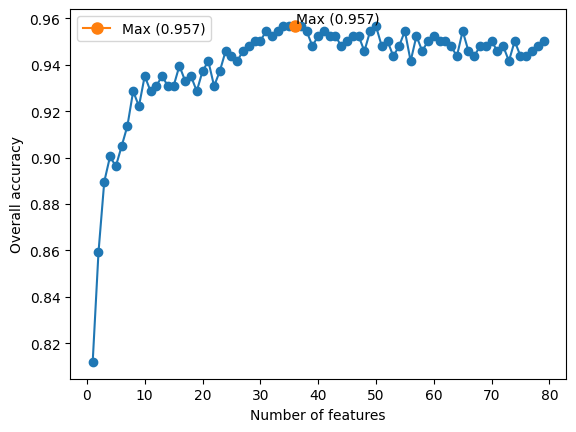

In [31]:
tr =pd.DataFrame([number_of_features,accuracies_overall])
tr=tr.T
tr.iloc[:,0]= tr.iloc[:,0].astype(int)
tr = tr.rename(columns={0: '0', 1: '1'})
#calculate the maixmum values with its index
maximum_value = tr['1'].max()
maximum_idx = tr['1'].idxmax()
#line chart plot
plt.plot(tr['0'], tr['1'], marker='o')
# add at maximum val
plt.plot(tr.loc[maximum_idx, '0'], maximum_value, marker='o', markersize=8, label=f'Max ({maximum_value:.3f})')
# add labels
plt.text(tr.loc[maximum_idx, '0'] + 0.2, maximum_value, f'Max ({maximum_value:.3f})', verticalalignment='bottom')
# title and x-y- labels:
plt.xlabel('Number of features')
plt.ylabel('Overall accuracy')
# show legend
plt.legend()
# diysplay chart
plt.show()
